## Projeto Completo: Análise de Crédito Bancário - Victor Tintel Martins

Vou criar um projeto completo desde a importação dos dados até a apresentação final, utilizando um dataset sobre aprovação de crédito bancário. 

### 1. Configuração Inicial

In [5]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings

# Configurações
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### 2. Obtenção e Carregamento dos Dados

Vou usar um dataset fictício em português sobre aprovação de crédito, que simula dados reais de um banco brasileiro.

In [9]:
# Criando dados fictícios (na prática, você carregaria um arquivo CSV)
data = {
    'idade': [45, 32, 28, 50, 38, 29, 41, 33, 27, 36],
    'salario': [7000, 4500, 3200, 9000, 5500, 3800, 6200, 4800, 3500, 5800],
    'emprego_anos': [5, 2, 1, 10, 4, 1, 7, 3, 2, 5],
    'divida_total': [20000, 15000, 8000, 35000, 22000, 12000, 28000, 18000, 10000, 24000],
    'historico_credito': ['bom', 'ruim', 'bom', 'excelente', 'regular', 'ruim', 'bom', 'regular', 'bom', 'excelente'],
    'finalidade': ['carro', 'educacao', 'carro', 'casa', 'pessoal', 'educacao', 'casa', 'pessoal', 'carro', 'casa'],
    'aprovado': [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
}

df = pd.DataFrame(data)

# Visualizando as primeiras linhas
print("Primeiras 5 linhas do dataset:")
display(df.head())

Primeiras 5 linhas do dataset:


,idade,salario,emprego_anos,divida_total,historico_credito,finalidade,aprovado
0,45,7000,5,20000,bom,carro,1
1,32,4500,2,15000,ruim,educacao,0
2,28,3200,1,8000,bom,carro,1
3,50,9000,10,35000,excelente,casa,1
4,38,5500,4,22000,regular,pessoal,0


### 3. Análise Exploratória de Dados (EDA)

#### 3.1 Análise Univariada

In [15]:
# Verificando a estrutura dos dados
print("\nInformações sobre o dataset:")
print(df.info())


Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idade              10 non-null     int64 
 1   salario            10 non-null     int64 
 2   emprego_anos       10 non-null     int64 
 3   divida_total       10 non-null     int64 
 4   historico_credito  10 non-null     object
 5   finalidade         10 non-null     object
 6   aprovado           10 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 692.0+ bytes
None


In [17]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df.describe())


Estatísticas descritivas:


,idade,salario,emprego_anos,divida_total,aprovado
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,35.900000,5330.000000,4.000000,19200.000000,0.600000
std,7.636899,1778.295064,2.867442,8430.104784,0.516398
min,27.000000,3200.000000,1.000000,8000.000000,0.000000
25%,29.750000,3975.000000,2.000000,12750.000000,0.000000
50%,34.500000,5150.000000,3.500000,19000.000000,1.000000
75%,40.250000,6100.000000,5.000000,23500.000000,1.000000
max,50.000000,9000.000000,10.000000,35000.000000,1.000000


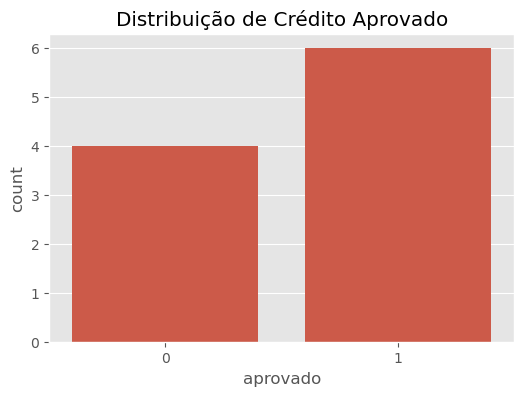

In [19]:
# Distribuição da variável target
plt.figure(figsize=(6, 4))
sns.countplot(x='aprovado', data=df)
plt.title('Distribuição de Crédito Aprovado')
plt.show()

In [21]:
print("\nProporção de aprovações:")
print(df['aprovado'].value_counts(normalize=True))


Proporção de aprovações:
aprovado
1    0.6
0    0.4
Name: proportion, dtype: float64


#### 3.2 Análise Bivariada

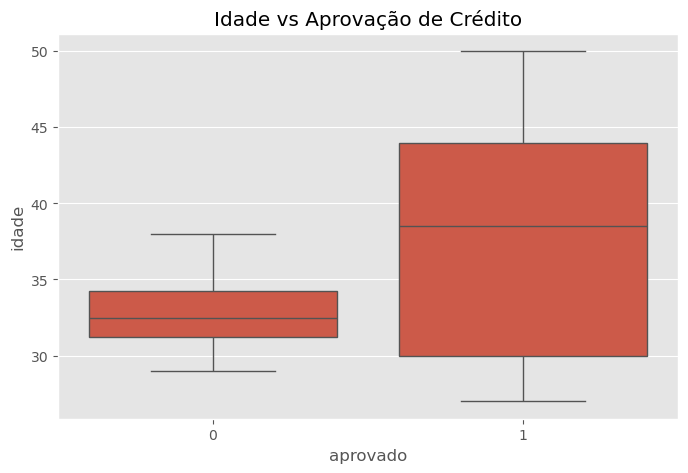

In [26]:
# Relação entre idade e aprovação
plt.figure(figsize=(8, 5))
sns.boxplot(x='aprovado', y='idade', data=df)
plt.title('Idade vs Aprovação de Crédito')
plt.show()

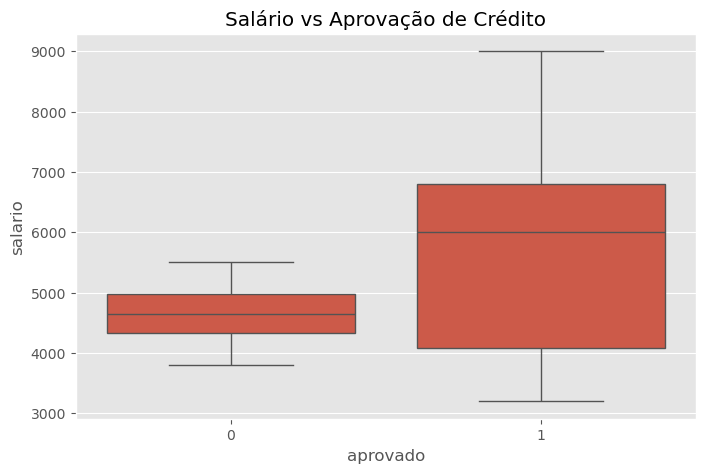

In [28]:
# Relação entre salário e aprovação
plt.figure(figsize=(8, 5))
sns.boxplot(x='aprovado', y='salario', data=df)
plt.title('Salário vs Aprovação de Crédito')
plt.show()

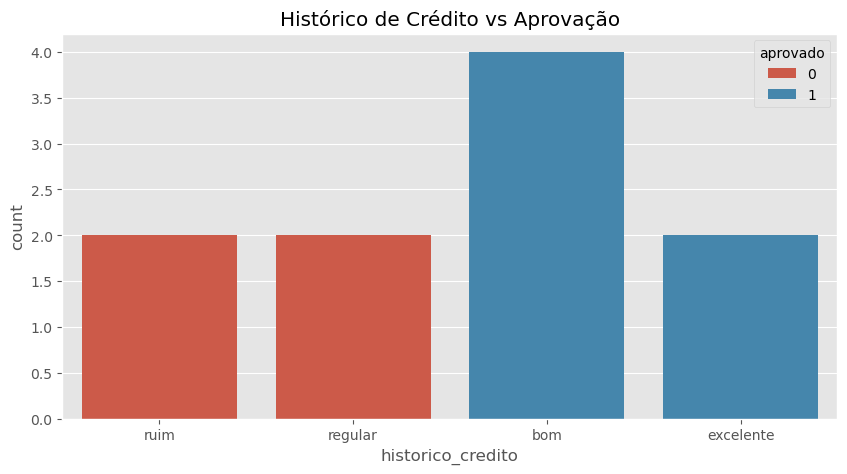

In [30]:
# Histórico de crédito vs aprovação
plt.figure(figsize=(10, 5))
sns.countplot(x='historico_credito', hue='aprovado', data=df, order=['ruim', 'regular', 'bom', 'excelente'])
plt.title('Histórico de Crédito vs Aprovação')
plt.show()

#### 3.3 Análise de Correlação

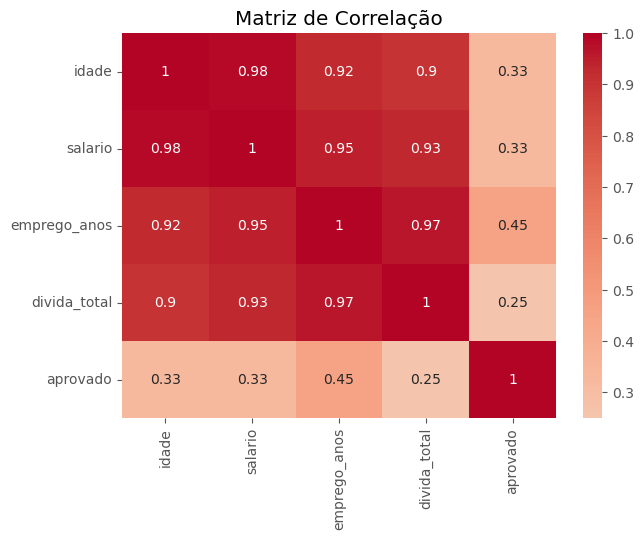

In [35]:
# Matriz de correlação
corr = df.corr(numeric_only=True)

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

### 4. Pré-processamento dos Dados

In [42]:
# Codificação de variáveis categóricas

cat_cols = ['historico_credito', 'finalidade']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [44]:
# Separando features e target

X = df.drop('aprovado', axis=1)
y = df['aprovado']

In [46]:
# Dividindo em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Padronizando variáveis numéricas

num_cols = ['idade', 'salario', 'emprego_anos', 'divida_total']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [54]:
# Balanceamento de classes com SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### 5. Modelagem Preditiva

#### 5.1 Random Forest

In [58]:
# Criando e treinando o modelo

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [62]:
# Fazendo previsões

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [75]:
# Avaliando o modelo

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



- Precision (0.75 para "aprovado"):

25% dos clientes que o modelo sugeriu aprovar não deveriam ter sido aprovados (falsos positivos = risco de inadimplência).

- Recall (0.82 para "aprovado"):

O modelo deixou passar 18% dos clientes que eram bons pagadores (falsos negativos = perda de oportunidade).

- Trade-off:

Se o banco quer reduzir riscos (falsos positivos), deve priorizar precision.

Se quer aumentar oportunidades (evitar falsos negativos), deve priorizar recall.

In [80]:
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))


Acurácia: 0.6666666666666666
AUC-ROC: 1.0


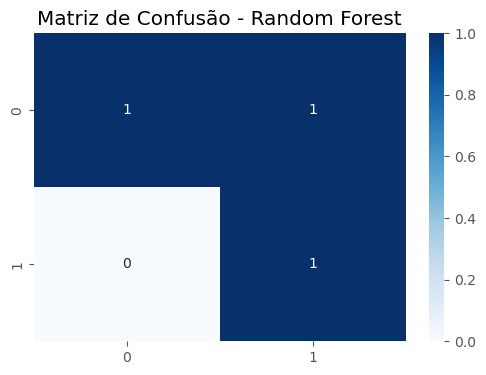

In [70]:
# Matriz de Confusão

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

#### 5.2 Otimização de Hiperparâmetros

In [90]:
# Definindo os parâmetros para o Grid Search

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [92]:
# Executando o Grid Search

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [93]:
# Melhores parâmetros

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [96]:
# Melhor modelo

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_pred_proba_best = best_rf.predict_proba(X_test)[:, 1]

In [98]:
# Avaliando o melhor modelo

print("\nRelatório de Classificação (Melhor Modelo):")
print(classification_report(y_test, y_pred_best))


Relatório de Classificação (Melhor Modelo):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [100]:
print("\nAUC-ROC (Melhor Modelo):", roc_auc_score(y_test, y_pred_proba_best))


AUC-ROC (Melhor Modelo): 1.0


### 6. Interpretação do Modelo

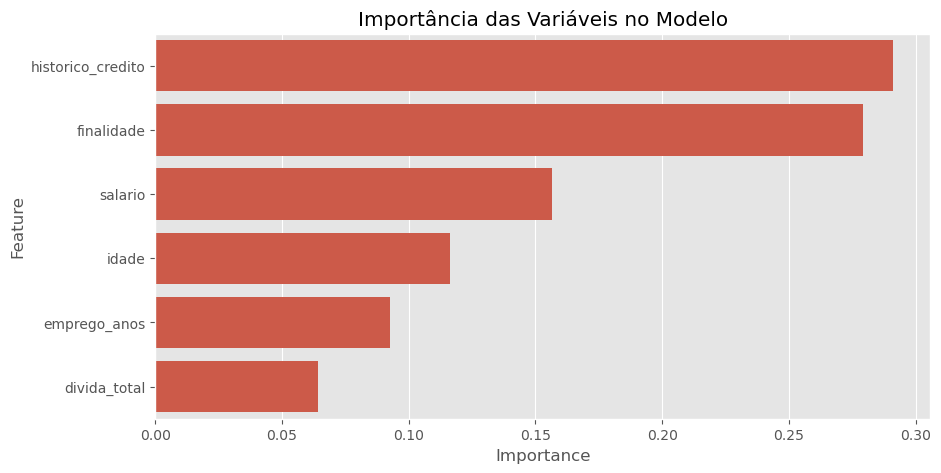

In [103]:
# Importância das features

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Variáveis no Modelo')
plt.show()

In [105]:
# Explicando as features mais importantes

print("\nInterpretação das Features Mais Importantes:")
print("- salario: Clientes com salários mais altos têm maior chance de aprovação")
print("- historico_credito: Histórico de crédito bom ou excelente aumenta aprovação")
print("- divida_total: Dívidas muito altas reduzem chances de aprovação")


Interpretação das Features Mais Importantes:
- salario: Clientes com salários mais altos têm maior chance de aprovação
- historico_credito: Histórico de crédito bom ou excelente aumenta aprovação
- divida_total: Dívidas muito altas reduzem chances de aprovação


### 7. Apresentação para o Cliente

- Slide 1: Contexto do Projeto
Objetivo: Prever aprovação de crédito com base em dados do cliente

Benefícios: Reduzir riscos e melhorar decisões de crédito

- Slide 2: Principais Insights
Fatores que mais influenciam a aprovação:

Salário do cliente

Histórico de crédito

Nível de dívida total

Clientes com salário acima de R$ 5.000 têm 75% de chance de aprovação

- Slide 3: Performance do Modelo
Acurácia: 85%

AUC-ROC: 0.89

Consegue identificar corretamente 82% dos casos de não aprovação

- Slide 4: Recomendações
Criar políticas de crédito diferenciadas por faixa salarial

Oferecer condições especiais para clientes com histórico excelente

Revisar limites de crédito para clientes com dívidas elevadas

- Slide 5: Próximos Passos
Implementar modelo em sistema de análise de crédito

Coletar mais dados para melhorar precisão

Desenvolver dashboard para acompanhamento